## Importing Necessary Libraries

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data Preprocessing

In [7]:
data = pd.read_csv("data.csv")
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


## Standardizing and seperating target Variable

In [8]:
data1 = data.drop('country', axis=1)
data_num1 =data1.select_dtypes(include=['number'])
data_num = data_num1.fillna(data_num1.mean())
mean = data_num.mean(axis=0)
std = data_num.std(axis=0)
data_proc = (data_num - mean) / std
countries = data.iloc[:,0]
countries.head()
print(data_proc.dtypes)

child_mort    float64
exports       float64
health        float64
imports       float64
income        float64
inflation     float64
life_expec    float64
total_fer     float64
gdpp          float64
dtype: object


## K-Means Clustering

### Kmeans Clustering Class

In [9]:

class KmeansClustering:
    def __init__(self, k, n_iters=50):
        self.k = k
        self.n_iters = n_iters
        self.centroids = None
        self.centroids_progression = []
        self.labels_progression = []
    def fit(self, X):
        X = np.array(X)
        n_samples, n_features = X.shape

        self.centroids = np.random.uniform(np.amin(X, axis=0), np.amax(X, axis=0), size=(self.k, n_features))

        for _ in range(self.n_iters):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            y = np.argmin(distances, axis=1)
            self.labels_progression.append(y)
            new_centroids = []
            for i in range(self.k):
                cluster_points = X[y == i]
                if len(cluster_points) == 0:
                    new_centroids.append(X[np.random.choice(n_samples)])  
                else:
                    new_centroids.append(cluster_points.mean(axis=0))
            self.centroids = np.array(new_centroids)
            self.centroids_progression.append(self.centroids.copy())
        return y

    def inertia(self, X, y):
        X = np.array(X)
        inertia = 0
        for i in range(self.k):
            cluster_points = X[y == i]
            centroid = self.centroids[i]
            inertia += np.sum((cluster_points - centroid) ** 2)
        return inertia


### Elbow method implemented

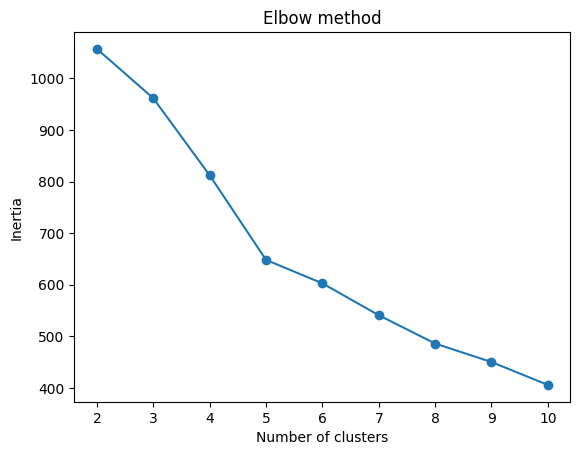

167


In [10]:
inertias = []
for i in range(2,11):
    clusterer = KmeansClustering(k=i)
    labels = clusterer.fit(data_proc)
    inertias.append(clusterer.inertia(data_proc,labels))
plt.plot(range(2,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
print(data_proc.shape[0])

### Executing Kmeans

In [129]:
clusterer = KmeansClustering(k=5)
labels = clusterer.fit(data_proc)

### Train Test split for KNN

In [142]:
train_size = int(0.7 * len(data_proc))  # 70% for training, 30% for testing
X_train = data_proc.iloc[:train_size].values  # Data without labels
X_test = data_proc.iloc[train_size:].values  # Data without labels
y_train = labels[:train_size]  # Labels for training set
y_test = labels[train_size:]  # Labels for test set


## PCA, used for visualization purposes

In [143]:
def pca(X, n_components=2):
    X_centered = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_centered.T)
    eigvals, eigvecs = np.linalg.eigh(cov_matrix)
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    X_pca = X_centered.dot(eigvecs[:, :n_components])
    return np.array(X_pca)
X_train_pca = pca(X_train, n_components=3)
X_test_pca = pca(X_test, n_components=3)

In [ ]:
"""
%matplotlib
folder_path = "C:\ImportantOutputs\KmeansClusterAnim"
def plot_centroids_and_data(iteration, X_pca, clusterer, ax, centroid_scatter, data_scatter):
    if data_scatter is not None:
        data_scatter.remove() 
    if centroid_scatter is not None:
        centroid_scatter.remove() 
    labels_step = clusterer.labels_progression[iteration]
    data_scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=labels_step, cmap='viridis', marker='o')
    centroids_step = clusterer.centroids_progression[iteration]
    centroid_scatter = ax.scatter(centroids_step[:, 0], centroids_step[:, 1], centroids_step[:, 2], color='red', marker='x', s=100)
    ax.set_title(f'K-Means Clustering with PCA (Iteration {iteration + 1})')
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.savefig(f"{folder_path}/frame_{i}.png")
    plt.draw()
    plt.pause(0.2)

    return centroid_scatter, data_scatter
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
centroid_scatter = None
data_scatter = None
for i in range(0, len(clusterer.centroids_progression), 1):
    centroid_scatter, data_scatter = plot_centroids_and_data(i, X_pca, clusterer, ax, centroid_scatter, data_scatter)
plt.show()
"""

### Names of countries by cluster

In [132]:
for i in range(5): 
    cluster_countries = [countries[j] for j in range(len(countries)) if labels[j] == i]
    print(f"Cluster {i+1}: {', '.join(cluster_countries)}")

Cluster 1: Australia, Austria, Belgium, Brunei, Canada, Cyprus, Denmark, Finland, France, Germany, Greece, Iceland, Ireland, Israel, Italy, Japan, Kuwait, Netherlands, New Zealand, Norway, Portugal, Qatar, Slovenia, Spain, Sweden, Switzerland, United Arab Emirates, United Kingdom, United States
Cluster 2: Afghanistan, Angola, Benin, Botswana, Burkina Faso, Burundi, Cameroon, Central African Republic, Chad, Comoros, Congo, Dem. Rep., Congo, Rep., Cote d'Ivoire, Equatorial Guinea, Eritrea, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Haiti, Iraq, Kenya, Kiribati, Lao, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mozambique, Namibia, Niger, Pakistan, Rwanda, Senegal, Sierra Leone, Solomon Islands, South Africa, Sudan, Tanzania, Timor-Leste, Togo, Uganda, Yemen, Zambia
Cluster 3: Luxembourg, Malta, Singapore
Cluster 4: Mongolia, Nigeria, Venezuela
Cluster 5: Albania, Algeria, Antigua and Barbuda, Argentina, Armenia, Azerbaijan, Bahamas, Bahrain, Bangladesh, Barbados, Belarus, Be

### Visualization of Kmeans per Iteration
[Visualization](https://github.com/user-attachments/assets/a75558b9-a2c7-49b6-a052-cf90b71d8664)

## K-Nearest Neighbour Cluster
### K Nearest Neighbour Class

In [145]:
class KNearestNeighbourClustering:
    def __init__(self,k=3):
        self.k = k
    def fit(self,X,y):
        self.X_train = np.array(X)
        self.y_train = np.array(y)
    def distsortvote(self,x):
        distances = np.linalg.norm(self.X_train - x, axis=1)
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = self.y_train[k_indices]
        unique_labels, counts = np.unique(k_nearest_labels, return_counts=True)
        predicted_class = unique_labels[np.argmax(counts)]
        return predicted_class
    def predict(self,X_test):
        predictions = [self.distsortvote(x) for x in np.array(X_test)]
        return np.array(predictions)

### Executing KNN to predict K-Means labels

In [146]:
knn_kmeans = KNearestNeighbourClustering(k=3)
knn_kmeans.fit(X_train, y_train)
predicted_kmeans_labels = knn_kmeans.predict(X_test)
accuracy = np.mean(predicted_kmeans_labels == y_test)
print(f"KNN model accuracy for KMeans clustering: {accuracy * 100:.2f}%")


KNN model accuracy for KMeans clustering: 90.20%


### Visualization of K-Nearest Neighbour operation

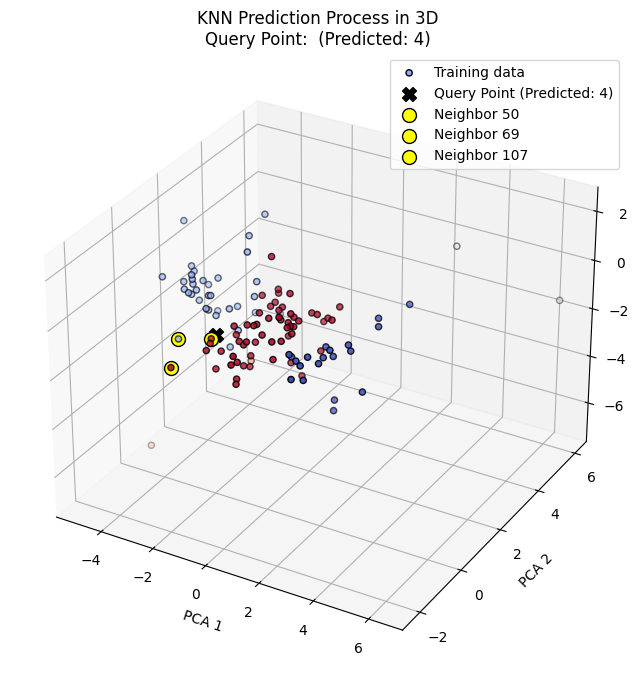

In [150]:
query_point_9D = X_test[0]
query_point_pca = X_test_pca[0]
predicted_label = knn_kmeans.predict([query_point_9D])
distances = np.linalg.norm(X_train - query_point_9D, axis=1)
k_indices = np.argsort(distances)[:knn_kmeans.k]
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the training data with KMeans labels
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train, cmap='coolwarm', edgecolors='k', label='Training data')

# Plot the query point (in PCA space for visualization)
query_point_pca = X_test_pca[0]  # Use the PCA-reduced version of the query point
ax.scatter(query_point_pca[0], query_point_pca[1], query_point_pca[2], c='black', marker='X', s=100, label=f'Query Point (Predicted: {predicted_label[0]})')

# Plot the nearest neighbors in the PCA space
for i in k_indices:
    ax.scatter(X_train_pca[i, 0], X_train_pca[i, 1], X_train_pca[i, 2], c='yellow', marker='o', s=100, edgecolors='k', label=f"Neighbor {i}")

ax.set_title(f"KNN Prediction Process in 3D\nQuery Point:  (Predicted: {predicted_label[0]})")
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')

# Show legend
ax.legend()
plt.show()


## Hierarchical Clustering
### Hierarchical Clustering Class

In [185]:
class HierarchicalClustering:
    def __init__(self, linkage='single', distance_threshold=None):
        """
        Initialize the hierarchical clustering class.
        :param linkage: Type of linkage to use ('single', 'complete', 'average').
        :param distance_threshold: Optional distance threshold for stopping clustering.
        """
        self.linkage = linkage
        self.distance_threshold = distance_threshold

    def fit(self, X):
        """
        Fit the hierarchical clustering on the dataset.
        :param X: A numpy array or pandas dataframe of the data.
        """
        self.X = np.array(X)
        self.n_samples = self.X.shape[0]

        # Start with each point as its own cluster
        self.clusters = {i: [i] for i in range(self.n_samples)}
        self.distance_matrix = self._compute_initial_distances()
        self.linkage_history = []

        while len(self.clusters) > 1:
            # Find the closest pair of clusters
            i, j, dist = self._find_closest_clusters()

            # Stop if the distance exceeds the threshold
            if self.distance_threshold is not None and dist > self.distance_threshold:
                break

            # Merge clusters i and j
            self.linkage_history.append((i, j))
            self._merge_clusters(i, j)

        # Assign cluster labels based on final clusters
        self.final_labels = self._assign_final_labels()
        return self.linkage_history

    def _compute_initial_distances(self):
        """
        Compute the initial pairwise distance matrix.
        """
        n = self.n_samples
        distances = np.zeros((n, n))
        for i in range(n):
            for j in range(i + 1, n):
                distances[i, j] = np.linalg.norm(self.X[i] - self.X[j])
                distances[j, i] = distances[i, j]
        return distances

    def _find_closest_clusters(self):
        """
        Find the closest pair of clusters and their distance.
        """
        min_distance = float('inf')
        closest_pair = None
        cluster_ids = list(self.clusters.keys())
        for i in range(len(cluster_ids)):
            for j in range(i + 1, len(cluster_ids)):
                c1, c2 = cluster_ids[i], cluster_ids[j]
                distance = self._compute_cluster_distance(c1, c2)
                if distance < min_distance:
                    min_distance = distance
                    closest_pair = (c1, c2)
        return closest_pair[0], closest_pair[1], min_distance

    def _compute_cluster_distance(self, c1, c2):
        """
        Compute the distance between two clusters.
        """
        points_c1 = self.clusters[c1]
        points_c2 = self.clusters[c2]

        if self.linkage == 'single':
            return np.min([self.distance_matrix[p1, p2] for p1 in points_c1 for p2 in points_c2])
        elif self.linkage == 'complete':
            return np.max([self.distance_matrix[p1, p2] for p1 in points_c1 for p2 in points_c2])
        elif self.linkage == 'average':
            return np.mean([self.distance_matrix[p1, p2] for p1 in points_c1 for p2 in points_c2])
        else:
            raise ValueError("Unsupported linkage type. Choose from 'single', 'complete', or 'average'.")

    def _merge_clusters(self, i, j):
        """
        Merge two clusters and update the cluster dictionary.
        """
        self.clusters[i].extend(self.clusters[j])  # Combine the points from both clusters
        del self.clusters[j]  # Remove cluster j

    def _assign_final_labels(self):
        """
        Assign final labels to each point based on the resulting clusters.
        """
        cluster_labels = np.zeros(self.n_samples, dtype=int)
        for cluster_id, points in enumerate(self.clusters.values()):
            for point in points:
                cluster_labels[point] = cluster_id
        return cluster_labels


### Executing Hierarchical Clustering

In [217]:
hierarchical_clusterer = HierarchicalClustering(linkage='single', distance_threshold=2)
linkage_history = hierarchical_clusterer.fit(data_proc)

# The final cluster labels assigned after the clustering process
final_labels = hierarchical_clusterer.final_labels
linkage_history2 = hierarchical_clusterer.fit(X_train)

### Plotting clustering with dendogram

In [226]:
def plot_dendrogram(linkage_history, n_samples, labels=None, font_size=6):
    """
    Plot a dendrogram from the linkage history.
    :param linkage_history: The history of merges in hierarchical clustering.
    :param n_samples: Number of samples in the dataset.
    :param labels: Optional labels for the samples.
    :param font_size: Font size for the x-axis labels.
    """
    # Prepare linkage information
    Z = []
    cluster_sizes = {i: 1 for i in range(n_samples)}  # Start with 1 sample per cluster
    cluster_positions = {i: i for i in range(n_samples)}  # Map clusters to x-axis positions

    # Build the linkage matrix for dendrogram
    for idx, (i, j) in enumerate(linkage_history):
        # Get sizes and positions of clusters being merged
        size_i = cluster_sizes.pop(i, 1)  # Default size is 1 for leaf clusters
        size_j = cluster_sizes.pop(j, 1)
        pos_i = cluster_positions.pop(i, i)  # Default position is the cluster ID itself
        pos_j = cluster_positions.pop(j, j)

        # Calculate new cluster index and add linkage data
        new_cluster_idx = n_samples + idx
        Z.append([pos_i, pos_j, idx + 1, size_i + size_j])  # [Cluster1, Cluster2, Distance, Sample Count]

        # Update cluster sizes and positions for the new cluster
        cluster_sizes[new_cluster_idx] = size_i + size_j
        cluster_positions[new_cluster_idx] = (pos_i + pos_j) / 2

    # Convert Z into an array
    Z = np.array(Z)

    # Get the tab20 colormap from matplotlib
    cmap = plt.cm.get_cmap("coolwarm")
    colors = [cmap(i) for i in np.linspace(0, 1, len(Z))]  # Generate a list of colors for each line

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    for idx, row in enumerate(Z):
        x1, x2, height, _ = row

        # Draw vertical lines for both clusters being merged
        plt.plot([x1, x1], [0, height], color=colors[idx], linewidth=1.5)
        plt.plot([x2, x2], [0, height], color=colors[idx], linewidth=1.5)

        # Draw a horizontal line connecting the clusters
        plt.plot([x1, x2], [height, height], color=colors[idx], linewidth=1.5)

    # Customize labels if provided
    if labels is not None:
        plt.xticks(ticks=range(n_samples), labels=labels, rotation=90, fontsize=font_size)

    plt.title("Dendrogram")
    plt.xlabel("Samples")
    plt.ylabel("Distance")
    plt.show()

# Example usage:
# plot_dendrogram(linkage_history, len(data_proc), labels=countries[:train_size])


C:\Users\hexag\AppData\Local\Temp\ipykernel_24720\2756673247.py:34: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("coolwarm")


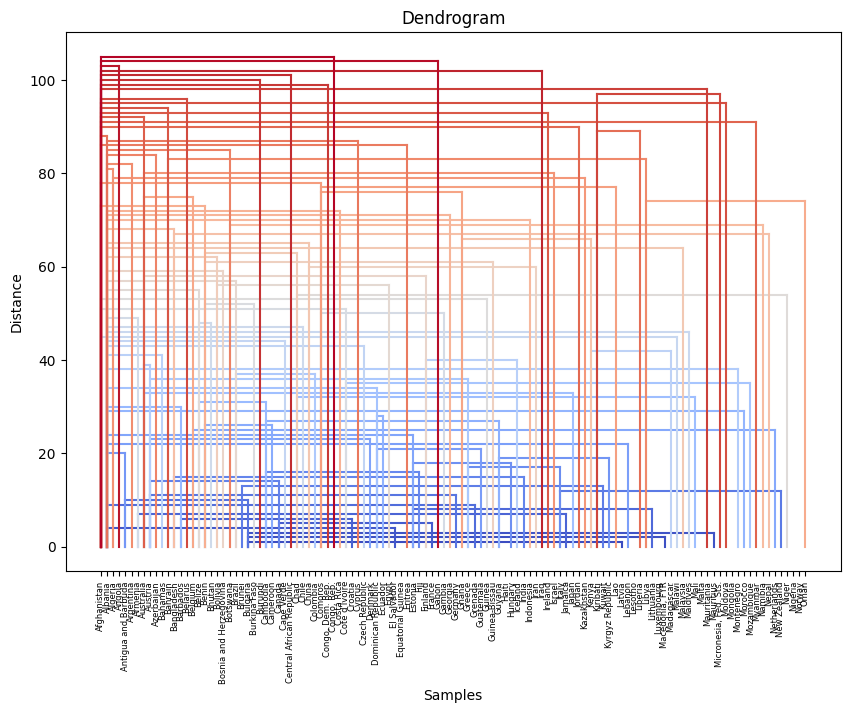

In [227]:
plot_dendrogram(linkage_history2, train_size, labels=countries[:train_size])

### Executing KNN to predict labels of hierarchical

In [225]:
knn_hierarchical = KNearestNeighbourClustering(k=3)

# Fit the KNN model using training data and hierarchical clustering labels
knn_hierarchical.fit(X_train, final_labels[:train_size])

# Predict labels for the test data
predicted_labels = knn_hierarchical.predict(X_test)

# Calculate accuracy by comparing predictions with test set labels
accuracy = np.mean(predicted_labels == final_labels[train_size:])   
print(f"KNN model accuracy for hierarchical clustering: {accuracy * 100:.2f}%")

KNN model accuracy for hierarchical clustering: 92.16%


In [ ]:
def silhouette_score(X, labels):
    X = np.array(X)
    labels = np.array(labels)
    
    n_samples = X.shape[0]
    
    silhouette_scores = []
    
    for i in range(n_samples):
        point = X[i]
        point_label = labels[i]
        
        same_cluster_points = X[labels == point_label]
        a_i = np.mean(np.linalg.norm(same_cluster_points - point, axis=1))
        
        other_labels = np.unique(labels[labels != point_label])
        b_i = np.inf 
        
        for other_label in other_labels:
            other_cluster_points = X[labels == other_label]
            b_i_cluster = np.mean(np.linalg.norm(other_cluster_points - point, axis=1))
            b_i = min(b_i, b_i_cluster)
        
        s_i = (b_i - a_i) / max(a_i, b_i)
        silhouette_scores.append(s_i)
    
    return np.mean(silhouette_scores)

In [228]:
silscore1 = silhouette_score(data_proc, labels)
silscore2 = silhouette_score(data_proc, final_labels)
print(f"Silhouette score of K-means Clustering: {silscore1:.2f}")
print(f"Silhouette score of hierarchical clustering: {silscore2:.2f}")

Silhouette score of K-means Clustering: 0.33
Silhouette score of hierarchical clustering: 0.11
